## EDA with Python workflow

| **Step**                      | **Objective**                     | **Key Actions / Code Examples**                                                                                                        | **Outputs**                        |
| ----------------------------- | --------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------- |
| **1. Environment Setup**      | Prepare Python environment        | Install/import libraries: `pandas`, `numpy`, `matplotlib`, `seaborn` (optional) <br> Set display options with `pd.set_option`          | Ready-to-use workspace             |
| **2. Load Data**              | Read dataset with correct parsing | `pd.read_csv("data.csv", sep=",", parse_dates=["DateCol"], index_col=None)`                                                            | DataFrame in memory                |
| **3. Basic Overview**         | Sanity-check dataset              | `df.shape`, `df.head()`, `df.tail()`, `df.sample(5)` <br> `df.dtypes.value_counts()`                                                   | Understand size & sample           |
| **4. Memory Usage**           | Check data size in MB             | `df.memory_usage(deep=True).sum() / 1024**2`                                                                                           | Size in MB                         |
| **5. Missing Values**         | Identify nulls                    | `df.isna().sum()` <br> Calculate %: `(df.isna().sum()/len(df))*100`                                                                    | Missing values table               |
| **6. Duplicates**             | Check data repetition             | `df.duplicated().sum()`                                                                                                                | Count of duplicate rows            |
| **7. Data Types Check**       | Ensure correct types              | Convert: <br>`df["Col"] = df["Col"].astype("category")`<br>`pd.to_datetime(df["Date"])`<br>`pd.to_numeric(df["Num"], errors="coerce")` | Correct dtypes                     |
| **8. Numeric Summary**        | Describe numeric columns          | `df.describe().T` <br> Add skew & kurtosis: `df.skew()`, `df.kurtosis()`                                                               | Stats table                        |
| **9. Categorical Summary**    | Analyze category frequency        | `df["Cat"].value_counts()` <br> Plot top N categories                                                                                  | Frequency tables & bar plots       |
| **10. Univariate Plots**      | Visualize each feature            | Numeric: Histograms & boxplots <br> Categorical: Bar charts                                                                            | Distribution plots                 |
| **11. Outlier Detection**     | Spot extreme values               | IQR Method: <br>`q1, q3 = s.quantile([0.25, 0.75])` <br>`iqr = q3-q1` <br> Lower/Upper bounds = `q1-1.5*iqr` & `q3+1.5*iqr`            | Outlier list/table                 |
| **12. Correlation Analysis**  | Check numeric relationships       | `df.corr()` <br> Plot heatmap                                                                                                          | Correlation matrix & plot          |
| **13. Group Analysis**        | Compare across categories         | `df.groupby("Cat")["Target"].mean()`                                                                                                   | Grouped stats                      |
| **14. Crosstabs**             | Explore category vs category      | `pd.crosstab(df["Cat1"], df["Cat2"], normalize="index")`                                                                               | Crosstab table                     |
| **15. Datetime Analysis**     | Analyze trends                    | Extract: `df["Year"] = df["Date"].dt.year` <br> Group by time: `df.groupby("Month")["Sales"].sum()`                                    | Trend/time series plots            |
| **16. Target Relationships**  | Link features to target           | Numeric target: correlations <br> Categorical target: group means or counts                                                            | Feature-Target relationship tables |
| **17. Missing Data Strategy** | Plan handling method              | Numerical: mean/median <br> Categorical: “Unknown” category or mode                                                                    | Cleaned dataset                    |
| **18. Data Quality Flags**    | Track issues                      | Create columns for missing/outlier flags                                                                                               | Flags in DataFrame                 |
| **19. Save Outputs**          | Preserve findings                 | Save CSV summaries: `df.to_csv()` <br> Save plots: `plt.savefig()`                                                                     | `eda_report/` folder               |
| **20. Documentation**         | Record EDA decisions              | Notes on missing value handling, outlier decisions, transformations                                                                    | Reproducible EDA log               |


In [2]:
# check version
pd.__version__

'2.3.1'

In [1]:
import numpy as np
import pandas as pd  # make sure to import pandas first

# create an array with Numpy
arr = np.array([1, 2, 3, 4, 5])

# create a DataFrame with Pandas
df = pd.DataFrame(arr, columns=['Numbers'])

# print the array
print(arr)

# print the DataFrame
print(df)


[1 2 3 4 5]
   Numbers
0        1
1        2
2        3
3        4
4        5


In [3]:
# import laibrary
import pandas as pd

In [4]:
#read the file
df = pd.read_csv('population_of_pakistan.csv')
df.head()


,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [5]:
# Save the DataFrame to an Excel file
df.to_excel("population_of_pakistan.xlsx", index=False)

In [6]:
# Read the CSV file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROVINCE                    528 non-null    object 
 1   DIVISION                    528 non-null    object 
 2   DISTRICT                    528 non-null    object 
 3   SUB DIVISION                528 non-null    object 
 4   AREA (sq.km)                528 non-null    float64
 5   ALL SEXES (RURAL)           528 non-null    int64  
 6   MALE (RURAL)                528 non-null    int64  
 7   FEMALE (RURAL)              528 non-null    int64  
 8   TRANSGENDER (RURAL)         528 non-null    int64  
 9   SEX RATIO (RURAL)           528 non-null    float64
 10  AVG HOUSEHOLD SIZE (RURAL)  528 non-null    float64
 11  POPULATION 1998 (RURAL)     528 non-null    int64  
 12  ANNUAL GROWTH RATE (RURAL)  528 non-null    float64
 13  ALL SEXES (URBAN)           528 non

In [7]:
# read the tail 
df.tail()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
523,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SARAROGHA TEHSIL,813.0,98180,51479,46694,7,110.25,...,72063,1.64,0,0,0,0,0.0,0.0,0,0.0
524,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SERWEKAI TEHSIL,398.0,54540,28695,25844,1,111.03,...,31472,2.93,0,0,0,0,0.0,0.0,0,0.0
525,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TIARZA TEHSIL,734.0,45156,23649,21507,0,109.96,...,37708,0.95,0,0,0,0,0.0,0.0,0,0.0
526,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TOI KHULLA TEHSIL,567.0,50413,27462,22947,4,119.68,...,36508,1.71,0,0,0,0,0.0,0.0,0,0.0
527,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,WANA TEHSIL,2315.0,153156,81342,71796,18,113.30,...,90772,2.79,0,0,0,0,0.0,0.0,0,0.0


In [8]:
# check the descriptive statistics
df.describe()

,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
count,528.000000,5.280000e+02,5.280000e+02,5.280000e+02,528.000000,528.000000,528.000000,5.280000e+02,528.000000,5.280000e+02,5.280000e+02,5.280000e+02,528.000000,528.000000,528.000000,5.280000e+02,528.000000
mean,1492.005871,2.462780e+05,1.252757e+05,1.209841e+05,18.174242,98.982614,6.277064,1.674280e+05,3.124792,1.408635e+05,7.284339e+04,6.799787e+04,22.276515,75.411269,4.406402,8.014457e+04,1.920814
std,2039.453778,2.711898e+05,1.375630e+05,1.337169e+05,25.522248,26.812660,2.074947,1.783890e+05,9.577872,3.512463e+05,1.823492e+05,1.688725e+05,66.068127,49.687341,2.948336,2.023120e+05,2.098908
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,425.000000,5.093450e+04,2.712725e+04,2.397900e+04,1.000000,101.105000,5.700000,3.527350e+04,1.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,882.000000,1.652410e+05,8.413450e+04,8.204400e+04,10.000000,105.285000,6.310000,1.172065e+05,2.030000,4.325450e+04,2.198000e+04,2.099900e+04,3.000000,103.195000,5.755000,2.129800e+04,1.855000
75%,1734.250000,3.129112e+05,1.605022e+05,1.522190e+05,25.000000,108.347500,7.200000,2.130542e+05,2.812500,1.178148e+05,6.030175e+04,5.746525e+04,19.000000,107.040000,6.340000,6.542225e+04,2.985000
max,18374.000000,2.297375e+06,1.172995e+06,1.124167e+06,213.000000,139.380000,12.430000,1.044035e+06,100.000000,3.653616e+06,1.905921e+06,1.746900e+06,795.000000,297.810000,10.060000,2.075867e+06,19.780000


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# load the titanic dataset
df = sns.load_dataset("titanic")

# display the first few rows of the dataset
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## what is the difference b/w Category and Object in python?

| Feature       | `object`                         | `category`                                  |
| ------------- | -------------------------------- | ------------------------------------------- |
| Data Type     | General-purpose (mostly strings) | Special dtype for repeated/fixed categories |
| Memory Usage  | Higher                           | Lower (stored as integers internally)       |
| Performance   | Slower for comparisons/groupby   | Faster for comparisons/groupby              |
| Best Use Case | Free text, unique strings        | Repeated strings, limited set of categories |


In [12]:
# display summary statistics of the dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# check the total number of rows
df.shape[0]

891

In [14]:
# find the missing values with percentages
df.isnull().sum()/len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

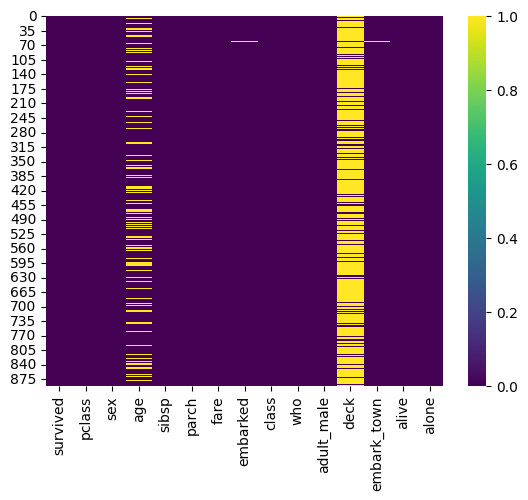

In [15]:
# visualize the missing values
sns.heatmap(df.isnull(), cmap='viridis')

### What is mean, median and mode?
- Mean: The mean is the average value of a dataset. 
- Median: The median is the middle value of a dataset when it is arranged in ascending order.
  - If there are odd number of values → the middle one is the median.
  - If there are even number of values → the average of the two middle values is the median.
- Mode: The mode is the most frequently occurring value in a dataset.

- When we have missing values (NaN) in a dataset, we often replace them with mean, median, or mode depending on the data type and distribution.
- 1. Mean Imputation:
  - Role: Replace missing values with the average of the available values.
  - Best for: Continuous numerical data that is normally distributed (no extreme outliers).
- 2. Median Imputation:
  - Role: Replace missing values with the middle value of the dataset.
  - Best for: Numerical data that is skewed or has outliers, since median is not affected by extreme values.
- 3. Mode Imputation:
  - Role: Replace missing values with the most frequent value.
  - Best for: Categorical data (e.g., Gender, City, Department).

### Comparison of Mean, Median & Mode Imputation
| Method     | Suitable For                                                            | Role in Missing Value Imputation                                 | Pros ✅                                                        | Cons ❌                                                             | Python Example                                            |
| ---------- | ----------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------- | ------------------------------------------------------------------ | --------------------------------------------------------- |
| **Mean**   | Continuous **numeric** data (normally distributed, no extreme outliers) | Replaces missing values with the **average** of available values | Simple & quick; Keeps dataset balanced                        | Sensitive to outliers → may distort results if data is skewed      | `data['col'].fillna(data['col'].mean(), inplace=True)`    |
| **Median** | Continuous **numeric** data (with skewness or outliers)                 | Replaces missing values with the **middle value**                | Robust against outliers; Works well for skewed data           | Doesn’t preserve actual data distribution perfectly                | `data['col'].fillna(data['col'].median(), inplace=True)`  |
| **Mode**   | **Categorical** data (or discrete numeric)                              | Replaces missing values with the **most frequent value**         | Best for categorical features; Keeps common categories intact | Can cause bias if mode dominates; Not suitable for continuous data | `data['col'].fillna(data['col'].mode()[0], inplace=True)` |


In [16]:
# check one dimenson data
df['sex']
# check two dimension data
df[['sex', 'age']]
# check three dimension data
df[['sex', 'age', 'fare']]

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
...,...,...,...
886,male,27.0,13.0000
887,female,19.0,30.0000
888,female,NaN,23.4500
889,male,26.0,30.0000


In [ ]:
# Get unique values in the 'sex' column
df['sex'].unique() # one dimensional array

array(['male', 'female'], dtype=object)

In [ ]:
# Get counts of 'sex', 'age', and 'fare' columns
df[['sex', 'age', 'fare']].count() # two dimensional array
df[['sex', 'age', 'fare']].nunique() # two dimensional array with unique counts

sex       2
age      88
fare    248
dtype: int64

In [ ]:
# Get unique counts of 'sex', 'age', and 'fare' columns
df[['sex', 'age', 'fare']].nunique()

sex       2
age      88
fare    248
dtype: int64

In [17]:
# check the unique values for each column
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

### Binary Data:
- Binary data refers to data that has only two possible values (categories, states, or outcomes).
- It is a special case of categorical data with just two classes.
- Examples:
  - Yes / No
  - Male / Female
  - 0 / 1
  - True / False
  - Pass / Fail
- Role of Binary Data in Data Science:
  - Often used for classification problems (e.g., spam / not spam).
  - Useful in machine learning models where categorical features are encoded as 0 and 1.
  - Forms the basis of binary variables (also called dummy variables when created from categorical data).
- Summary:
  - Binary data = data with two categories only (Yes/No, 0/1, True/False).
  - In Python, we usually represent it as booleans or 0/1 integers for analysis and machine learning.

### Note: In our Titanic dataset (based on the unique() counts you shared), we have:
- 5 binary variables:
  - Survived
  - Sex
  - Adult_male
  - Alive
  - Alone

In [ ]:
# to check in Titanic, from where how many people were on board
df['embark_town'].unique()
df[['embark_town']].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [29]:
# Calculate mean fare for male and female separately
fare_by_gender = df.groupby("sex")["fare"].mean()
print("Average Fare by Gender:\n", fare_by_gender)

# If we want other stats too (like min, max, median)
fare_stats = df.groupby("sex")["fare"].agg(["mean", "median", "min", "max"])
print("\nFare Statistics by Gender:\n", fare_stats)

Average Fare by Gender:
 sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

Fare Statistics by Gender:
              mean  median   min       max
sex                                      
female  44.479818    23.0  6.75  512.3292
male    25.523893    10.5  0.00  512.3292
